In [7]:
from functools import partial
import logging
import os
import pickle
import random
import subprocess

import networkx as nx
import osmnx as ox
from matplotlib import pyplot as plt

import bcnetwork as bc

# Get graph from OSM

## Utils

In [8]:
data_dir = partial(os.path.join, '../instances/treinta-y-tres')

## Load graph

In [9]:
file_cache = data_dir('treinta_y_tres.yaml')

def load_graph():
    file_cache_dir = os.path.dirname(file_cache)

    # Fix graph import from yaml
    if os.path.isfile(file_cache) and False:
        g = bc.persistance.read_graph_from_yaml(file_cache)
    else:
        g = ox.graph_from_place('Treinta y Tres, Treinta y Tres, Uruguay')
        g = bc.persistance.normalize_graph_shape(g)

        if not os.path.isdir(file_cache_dir):
            os.mkdir(file_cache_dir)
        bc.persistance.write_graph_to_yaml(g, file_cache)
    
    return g

## Problem definition

The origin destination matrix, demand and demand transfer decisions are all random.

### Data generation

In [12]:
model_cache = data_dir('model.pkl')

if os.path.exists(model_cache) and False:
    model = bc.model.Model.load(model_cache)
else:
    odpair_count = 8
    breakpoint_count = 4

    model = bc.model.RandomModel(
        odpair_count=odpair_count,
        breakpoint_count=breakpoint_count,
        graph=load_graph(),
        budget_factor=0.2,
    )


In [6]:
graph = model.graph
print(f'Nodes: {graph.number_of_nodes()}')
print(f'Edges: {graph.number_of_edges()}')
print(f'Multigraph: {graph.is_multigraph()}')
print(f'Directed: {graph.is_directed()}')

bc.draw.draw(model)

NameError: name 'model' is not defined

### Solve instance

In [6]:
solution_path = data_dir('solution.pkl')

if os.path.exists(solution_path):
    solution = bc.persistance.load(solution_path)
else:
    solution = model.solve()
    solution.save(solution_path)

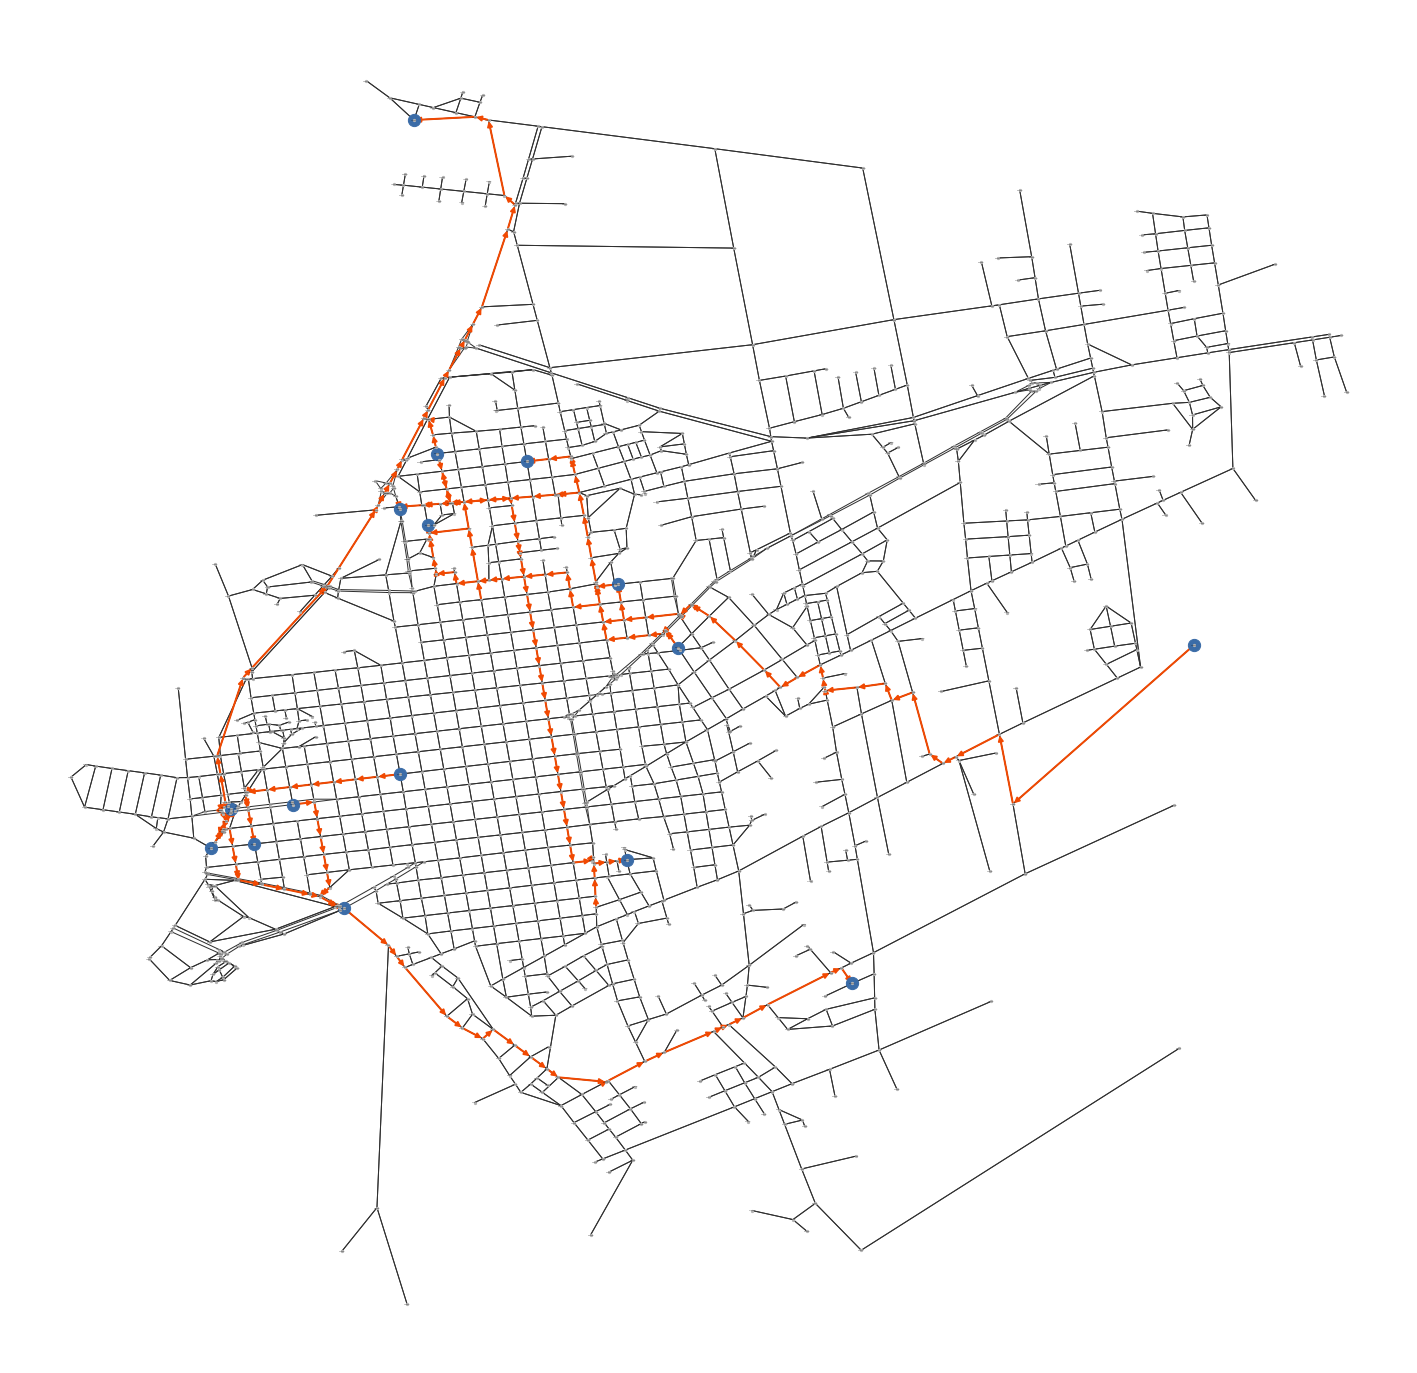

In [7]:
bc.draw.draw(model, solution=solution, with_labels=True, odpair_scale_factor=30)

In [13]:
solution.run_time_seconds

330.884087